<a href="https://colab.research.google.com/github/amyli2027/MultivariateLSTM/blob/main/dlstocktest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# A note on TensorFlow/Keras: The code below uses the widely-adopted Keras API,
# which is now integrated directly into TensorFlow.

# --- Step 1: Data Preparation ---
# Your sample data (a non-linear sequence for demonstration)
raw_data = np.array([10, 20, 30, 40, 50, 55, 63, 75, 80, 85, 95])

# Scale the data to be between 0 and 1. This is a crucial step for
# neural networks to perform well and converge faster.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data.reshape(-1, 1))

# Define the sequence length (look_back). This determines how many
# previous time steps are used to predict the next one.
# For your example, a look_back of 4 means we use [10, 20, 30, 40]
# to predict the next value.
look_back = 4

# Function to create sequences and targets for the model
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_data, look_back)

# Reshape the input data to the format required by LSTM:
# [samples, timesteps, features]
# 'samples' is the number of sequences (X_train.shape[0])
# 'timesteps' is the sequence length (look_back)
# 'features' is the number of variables (in this case, 1 for stock price)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Original Data:", raw_data)
print("Scaled Data:", scaled_data.flatten())
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("\nExample of training data:")
print("Input sequence (X):", scaler.inverse_transform(X_train[0, :, :]).flatten())
print("Target value (y):", scaler.inverse_transform([[y_train[0]]]).flatten()[0])
print("-" * 30)

# --- Step 2: Build the LSTM Model ---
model = Sequential()
# Add the LSTM layer. The input_shape is (timesteps, features).
model.add(LSTM(units=50, input_shape=(look_back, 1)))
# Add a Dense output layer with 1 unit for the single prediction.
model.add(Dense(units=1))

# Compile the model. 'adam' is a popular optimizer, and
# 'mean_squared_error' is a good loss function for regression tasks.
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel Summary:")
model.summary()

# --- Step 3: Train the Model ---
# We train the model on the prepared data. The 'epochs' parameter
# determines how many times the model will see the entire dataset.
print("\nTraining the model...")
model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=2)

# --- Step 4: Make a Prediction ---
# Let's try to predict the next value based on the last sequence
# from our original data, which is [75, 80, 85, 95].
# First, we need to scale this sequence.
last_sequence = raw_data[-look_back:]
scaled_last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

# Reshape the sequence to the format the model expects.
X_predict = np.reshape(scaled_last_sequence, (1, look_back, 1))

# Get the prediction from the model.
scaled_prediction = model.predict(X_predict)

# Invert the scaling to get the prediction in the original units.
predicted_value = scaler.inverse_transform(scaled_prediction)

print("\nPrediction complete.")
print(f"Input sequence for prediction: {last_sequence}")
print(f"Predicted next value: {predicted_value[0][0]:.2f}")


Original Data: [10 20 30 40 50 55 63 75 80 85 95]
Scaled Data: [0.         0.11764706 0.23529412 0.35294118 0.47058824 0.52941176
 0.62352941 0.76470588 0.82352941 0.88235294 1.        ]
Training Input (X_train) Shape: (7, 4, 1)
Training Target (y_train) Shape: (7,)

Example of training data:
Input sequence (X): [10. 20. 30. 40.]
Target value (y): 50.0
------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/200
7/7 - 2s - 310ms/step - loss: 0.6012
Epoch 2/200
7/7 - 0s - 24ms/step - loss: 0.4561
Epoch 3/200
7/7 - 0s - 7ms/step - loss: 0.3236
Epoch 4/200
7/7 - 0s - 12ms/step - loss: 0.2148
Epoch 5/200
7/7 - 0s - 20ms/step - loss: 0.1241
Epoch 6/200
7/7 - 0s - 12ms/step - loss: 0.0373
Epoch 7/200
7/7 - 0s - 11ms/step - loss: 0.0047
Epoch 8/200
7/7 - 0s - 11ms/step - loss: 0.0045
Epoch 9/200
7/7 - 0s - 20ms/step - loss: 0.0065
Epoch 10/200
7/7 - 0s - 20ms/step - loss: 0.0018
Epoch 11/200
7/7 - 0s - 19ms/step - loss: 5.3861e-04
Epoch 12/200
7/7 - 0s - 20ms/step - loss: 0.0011
Epoch 13/200
7/7 - 0s - 22ms/step - loss: 8.1617e-04
Epoch 14/200
7/7 - 0s - 20ms/step - loss: 6.3404e-04
Epoch 15/200
7/7 - 0s - 21ms/step - loss: 6.1125e-04
Epoch 16/200
7/7 - 0s - 21ms/step - loss: 5.7686e-04
Epoch 17/200
7/7 - 0s - 13ms/step - loss: 5.2370e-04
Epoch 18/200
7/7 - 0s - 13ms/step - loss: 5.5117e-04
Epoch 19/200
7/7 - 0s - 18ms/step - loss: 4.9229e-04
Epoch 20/200
7/7 - 0s -

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf # New import for fetching real stock data

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL up to the end of 2020
# Note: The 'auto_adjust' parameter is now True by default in yfinance.
# This means the 'Adj Close' column is no longer returned.
# We will use the 'Close' column, which contains the adjusted prices.
print("Fetching historical stock data for AAPL...")
aapl_data = yf.download('AAPL', start='1980-12-12', end='2020-12-31')
raw_data = aapl_data['Close'].values # Change from 'Adj Close' to 'Close'

# Scale the data to be between 0 and 1. This is a crucial step for
# neural networks to perform well and converge faster.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data.reshape(-1, 1))

# Define the sequence length (look_back). This determines how many
# previous time steps are used to predict the next one.
look_back = 60 # Using a larger look_back window for more data points

# Function to create sequences and targets for the model
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_data, look_back)

# Reshape the input data to the format required by LSTM:
# [samples, timesteps, features]
# 'samples' is the number of sequences (X_train.shape[0])
# 'timesteps' is the sequence length (look_back)
# 'features' is the number of variables (in this case, 1 for stock price)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Original Data Shape:", raw_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("\nFirst five input sequences for training:\n", scaler.inverse_transform(X_train[:5, :, :].reshape(-1, look_back)))
print("-" * 30)

# --- Step 2: Build the LSTM Model ---
model = Sequential()
# Add the LSTM layer. The input_shape is (timesteps, features).
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
# Add a Dense output layer with 1 unit for the single prediction.
model.add(Dense(units=1))

# Compile the model. 'adam' is a popular optimizer, and
# 'mean_squared_error' is a good loss function for regression tasks.
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel Summary:")
model.summary()

# --- Step 3: Train the Model ---
# We train the model on the prepared data. The 'epochs' parameter
# determines how many times the model will see the entire dataset.
print("\nTraining the model...")
# Training on real data can take a bit longer. Setting verbose to 1 to see progress.
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1)

# --- Step 4: Make a Prediction ---
# Let's predict the first value of 2021 based on the last sequence of 2020.
# First, get the last 'look_back' values from the original data.
last_sequence = raw_data[-look_back:]
scaled_last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

# Reshape the sequence to the format the model expects.
X_predict = np.reshape(scaled_last_sequence, (1, look_back, 1))

# Get the prediction from the model.
scaled_prediction = model.predict(X_predict)

# Invert the scaling to get the prediction in the original units.
predicted_value = scaler.inverse_transform(scaled_prediction)

print("\nPrediction complete.")
print(f"Input sequence for prediction (last {look_back} days of 2020): {last_sequence}")
print(f"Predicted value for the next trading day: ${predicted_value[0][0]:.2f}")


/tmp/ipython-input-149185505.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='1980-12-12', end='2020-12-31')
[*********************100%***********************]  1 of 1 completed

Fetching historical stock data for AAPL...
Original Data Shape: (10099, 1)
Training Input (X_train) Shape: (10039, 60, 1)
Training Target (y_train) Shape: (10039,)

First five input sequences for training:
 [[0.09848484 0.09334684 0.08649538 0.08863621 0.09120599 0.09677217
  0.10148205 0.10576448 0.11133069 0.12160749 0.12332012 0.12032295
  0.11689763 0.11818215 0.1156131  0.11047428 0.10576448 0.10362368
  0.10918982 0.10833348 0.10447996 0.10490818 0.10704905 0.10619268
  0.11261524 0.10918982 0.11133069 0.11261524 0.11218707 0.11047428
  0.10961808 0.10619268 0.10233916 0.09677217 0.09120599 0.09463131
  0.0980567  0.0980567  0.09848484 0.09334684 0.09334684 0.09034964
  0.08949257 0.0873517  0.08949257 0.09334684 0.08777986 0.08307001
  0.08435452 0.08135734 0.08649538 0.08777986 0.09077781 0.09120599
  0.08992151 0.08906437 0.08863621 0.08777986 0.0809292  0.07707492]
 [0.09334684 0.08649538 0.08863621 0.09120599 0.09677217 0.10148205
  0.10576448 0.11133069 0.12160749 0.1233201


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0048
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6010e-05
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.1496e-05
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.1322e-05
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1423e-05
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.9585e-05
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.8980e-05
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.9100e-05
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5650e-05
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0094e-05
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0823e-05
Epoch 12/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9875e-05
Epoch 13/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4057e-05
Epoch 14/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step 

#With overfitting measures in dropout layer
A dropout layer randomly removes or deactivates certain neurons in each step

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout # New import
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL up to the end of 2020
print("Fetching historical stock data for AAPL...")
aapl_data = yf.download('AAPL', start='1980-12-12', end='2020-12-31')
raw_data = aapl_data['Close'].values

# Scale the data to be between 0 and 1.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data.reshape(-1, 1))

# Define the sequence length (look_back).
look_back = 60

# Function to create sequences and targets for the model
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_data, look_back)

# Reshape the input data to the format required by LSTM:
# [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Original Data Shape:", raw_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build the LSTM Model with Dropout ---
model = Sequential()
# Add the first LSTM layer.
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
# Add a Dropout layer to prevent overfitting. We'll drop 20% of the neurons.
model.add(Dropout(0.2))
# Add the second LSTM layer.
model.add(LSTM(units=50))
# Add another Dropout layer before the output.
model.add(Dropout(0.2))
# Add the Dense output layer.
model.add(Dense(units=1))

# Compile the model.
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel Summary:")
model.summary()

# --- Step 3: Train the Model with a Validation Split ---
# We train the model on the prepared data. The validation_split
# argument reserves 20% of the data to validate against overfitting.
print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 4: Make a Prediction ---
# Get the last 'look_back' values from the original data.
last_sequence = raw_data[-look_back:]
scaled_last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

# Reshape the sequence for prediction.
X_predict = np.reshape(scaled_last_sequence, (1, look_back, 1))

# Get the prediction from the model.
scaled_prediction = model.predict(X_predict)

# Invert the scaling to get the prediction in the original units.
predicted_value = scaler.inverse_transform(scaled_prediction)

print("\nPrediction complete.")
print(f"Input sequence for prediction (last {look_back} days of 2020): {last_sequence}")
print(f"Predicted value for the next trading day: ${predicted_value[0][0]:.2f}")


Fetching historical stock data for AAPL...


/tmp/ipython-input-1666538784.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='1980-12-12', end='2020-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Original Data Shape: (10099, 1)
Training Input (X_train) Shape: (10039, 60, 1)
Training Target (y_train) Shape: (10039,)
------------------------------

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 1.2538e-04 - val_loss: 5.4290e-04
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 1.3998e-05 - val_loss: 3.2544e-04
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 1.2787e-05 - val_loss: 3.9485e-04
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 9.6866e-06 - val_loss: 5.9861e-04
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 1.0892e-05 - val_loss: 4.8115e-04
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 8.8571e-06 - val_loss: 8.8150e-04
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 8.5119e-06 - val_loss: 0.0017
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 1.0633e-05 - val_loss: 0.0015
Epoch 9/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 9.5746e-06 - val_loss: 5.5133e-04
Epoch 10/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 1.1096e-05 - val_loss: 0.0015
Epoch 11/25
126/126 ━━━━━━━━━━━━━

#Testing on 2021 and above

Fetching historical stock data for AAPL...


/tmp/ipython-input-2637574048.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='1980-12-12', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed

Training Data Shape: (10100, 1)
Testing Data Shape: (251, 1)
Training Input (X_train) Shape: (10040, 60, 1)
Training Target (y_train) Shape: (10040,)
------------------------------

Model Summary:



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - loss: 1.6738e-04 - val_loss: 4.3547e-04
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 1.2214e-05 - val_loss: 3.6212e-04
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 9.9304e-06 - val_loss: 7.3805e-04
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 9.7352e-06 - val_loss: 0.0011
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - loss: 9.8272e-06 - val_loss: 0.0011
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 9.7401e-06 - val_loss: 0.0012
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 8.1177e-06 - val_loss: 0.0011
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 8.1163e-06 - val_loss: 0.0031
Epoch 9/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - loss: 9.0357e-06 - val_loss: 0.0011
Epoch 10/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 9.1451e-06 - val_loss: 6.2116e-04
Epoch 11/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 

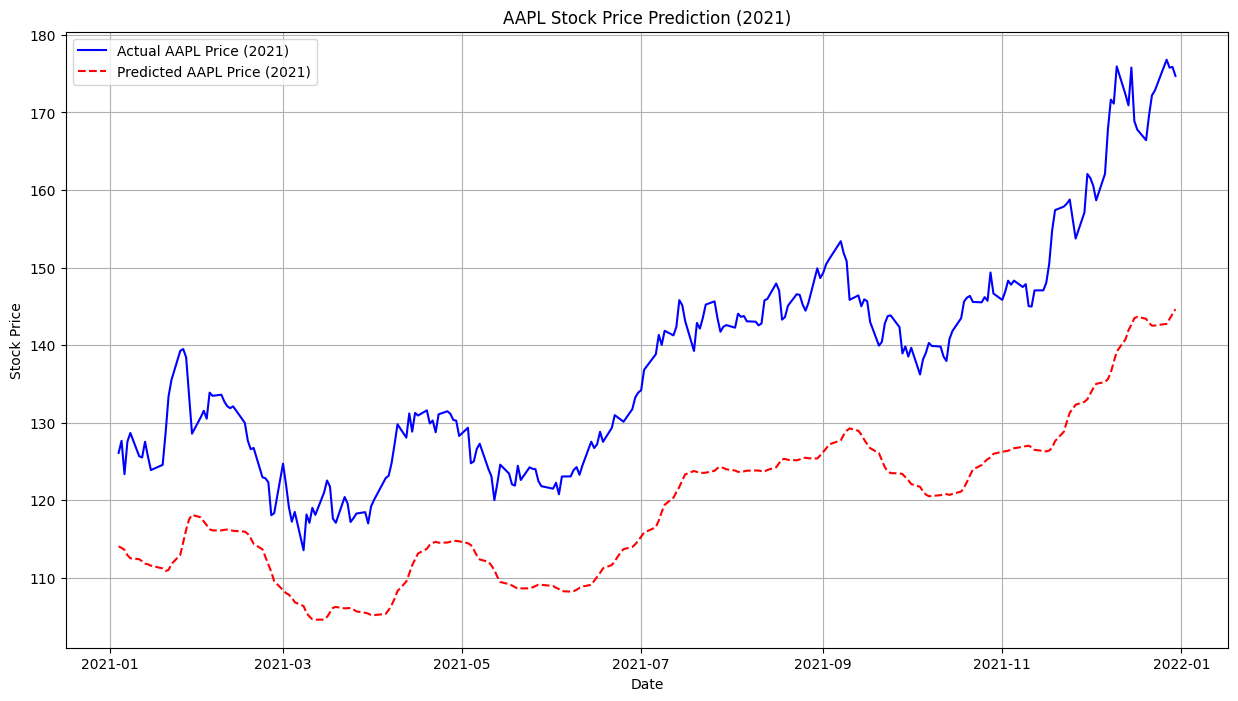


Root Mean Squared Error (RMSE) for 2021 predictions: 19.36


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL up to the end of 2021
print("Fetching historical stock data for AAPL...")
aapl_data = yf.download('AAPL', start='1980-12-12', end='2021-12-31')

# A more robust way to split the data by date range to avoid indexing errors
training_df = aapl_data.loc[:'2020-12-31']
testing_df = aapl_data.loc['2021-01-01':'2021-12-31']

training_data = training_df['Close'].values
testing_data = testing_df['Close'].values

# Scale the data using a scaler fitted only on the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data.reshape(-1, 1))
scaled_testing_data = scaler.transform(testing_data.reshape(-1, 1))

# Define the sequence length (look_back).
look_back = 60

# Function to create sequences and targets for the model
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data to the format required by LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
# Get the last look_back days from the training data to start the prediction loop
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.flatten().tolist()

# Loop through the testing data to make one prediction at a time
for i in range(len(scaled_testing_data)):
    # Reshape the current sequence for the model
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, 1)

    # Make a prediction
    scaled_prediction = model.predict(X_predict, verbose=0)

    # Store the predicted value
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual value from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i][0])

# Invert the predictions to the original price scale
predicted_prices = scaler.inverse_transform(np.array(predicted_2021).reshape(-1, 1))

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
# The dates for 2021 are now directly from the testing DataFrame index
dates_2021 = testing_df.index

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_data, color='blue', label='Actual AAPL Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted AAPL Price (2021)')
plt.title('AAPL Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


#Root square mean error is very bad, try without dropout layers

/tmp/ipython-input-2322574435.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='1980-12-12', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed

Fetching historical stock data for AAPL...
Training Data Shape: (10100, 1)
Testing Data Shape: (251, 1)
Training Input (X_train) Shape: (10040, 60, 1)
Training Target (y_train) Shape: (10040,)
------------------------------



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 1.3644e-04 - val_loss: 5.0673e-04
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 2.2934e-06 - val_loss: 5.2880e-04
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 2.7638e-06 - val_loss: 5.4693e-04
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 2.3357e-06 - val_loss: 4.5168e-04
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 2.7891e-06 - val_loss: 7.1413e-04
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 2.2927e-06 - val_loss: 4.2152e-04
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 2.2317e-06 - val_loss: 4.6899e-04
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 2.1128e-06 - val_loss: 6.2784e-04
Epoch 9/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 1.7037e-06 - val_loss: 3.6428e-04
Epoch 10/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 2.1627e-06 - val_loss: 4.5316e-04
Epoch 11/25
126/12

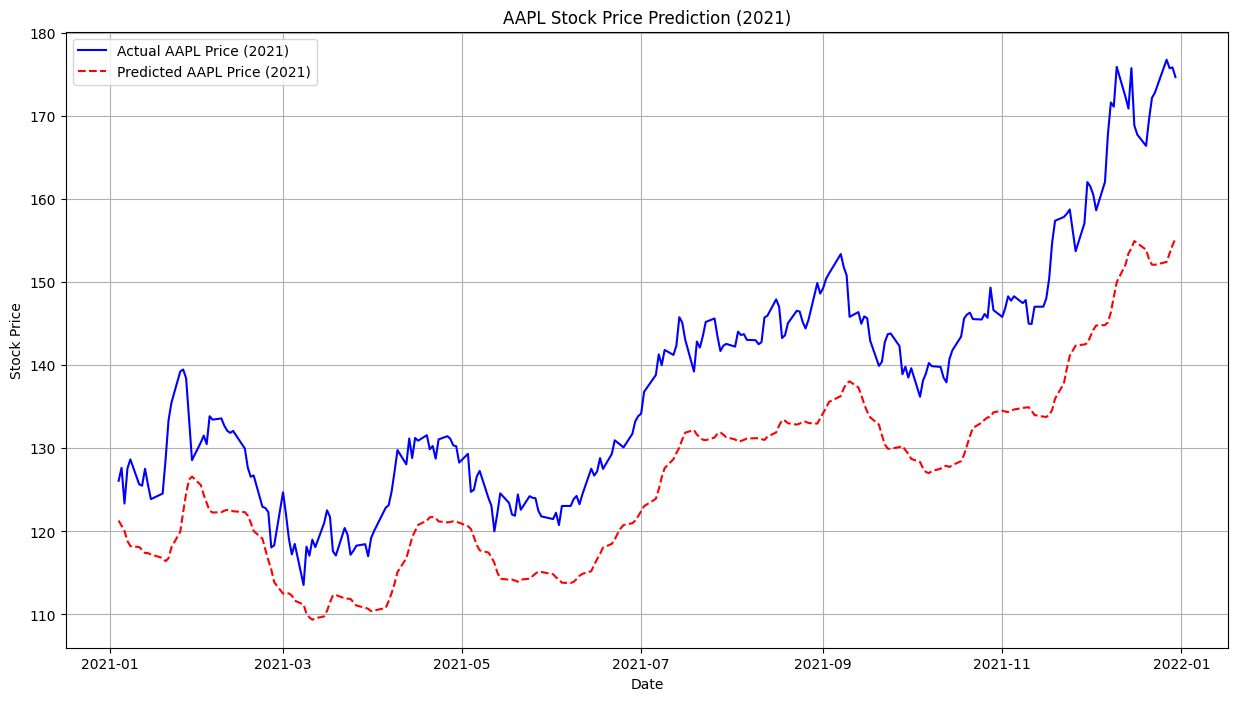


Root Mean Squared Error (RMSE) for 2021 predictions: 12.22


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL up to the end of 2021
print("Fetching historical stock data for AAPL...")
aapl_data = yf.download('AAPL', start='1980-12-12', end='2021-12-31')

# A more robust way to split the data by date range to avoid indexing errors
training_df = aapl_data.loc[:'2020-12-31']
testing_df = aapl_data.loc['2021-01-01':'2021-12-31']

training_data = training_df['Close'].values
testing_data = testing_df['Close'].values

# Scale the data using a scaler fitted only on the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data.reshape(-1, 1))
scaled_testing_data = scaler.transform(testing_data.reshape(-1, 1))

# Define the sequence length (look_back).
look_back = 60

# Function to create sequences and targets for the model
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data to the format required by LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
# Get the last look_back days from the training data to start the prediction loop
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.flatten().tolist()

# Loop through the testing data to make one prediction at a time
for i in range(len(scaled_testing_data)):
    # Reshape the current sequence for the model
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, 1)

    # Make a prediction
    scaled_prediction = model.predict(X_predict, verbose=0)

    # Store the predicted value
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual value from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i][0])

# Invert the predictions to the original price scale
predicted_prices = scaler.inverse_transform(np.array(predicted_2021).reshape(-1, 1))

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
# The dates for 2021 are now directly from the testing DataFrame index
dates_2021 = testing_df.index

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_data, color='blue', label='Actual AAPL Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted AAPL Price (2021)')
plt.title('AAPL Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


Fetching historical stock data for GOOG...


/tmp/ipython-input-3813204740.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('GOOG', start='1980-12-12', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed


Training Data Shape: (4122, 1)
Testing Data Shape: (251, 1)
Training Input (X_train) Shape: (4062, 60, 1)
Training Target (y_train) Shape: (4062,)
------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - val_loss: 0.0017
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.6212e-05 - val_loss: 0.0011
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.5207e-05 - val_loss: 0.0012
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.9403e-05 - val_loss: 0.0013
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7434e-05 - val_loss: 9.6522e-04
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6207e-05 - val_loss: 0.0011
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.6257e-05 - val_loss: 0.0010
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6583e-05 - val_loss: 0.0010
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1507e-05 - val_loss: 8.7313e-04
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8545e-05 - val_loss: 9.0186e-04
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.3965e-05 - val_loss: 8

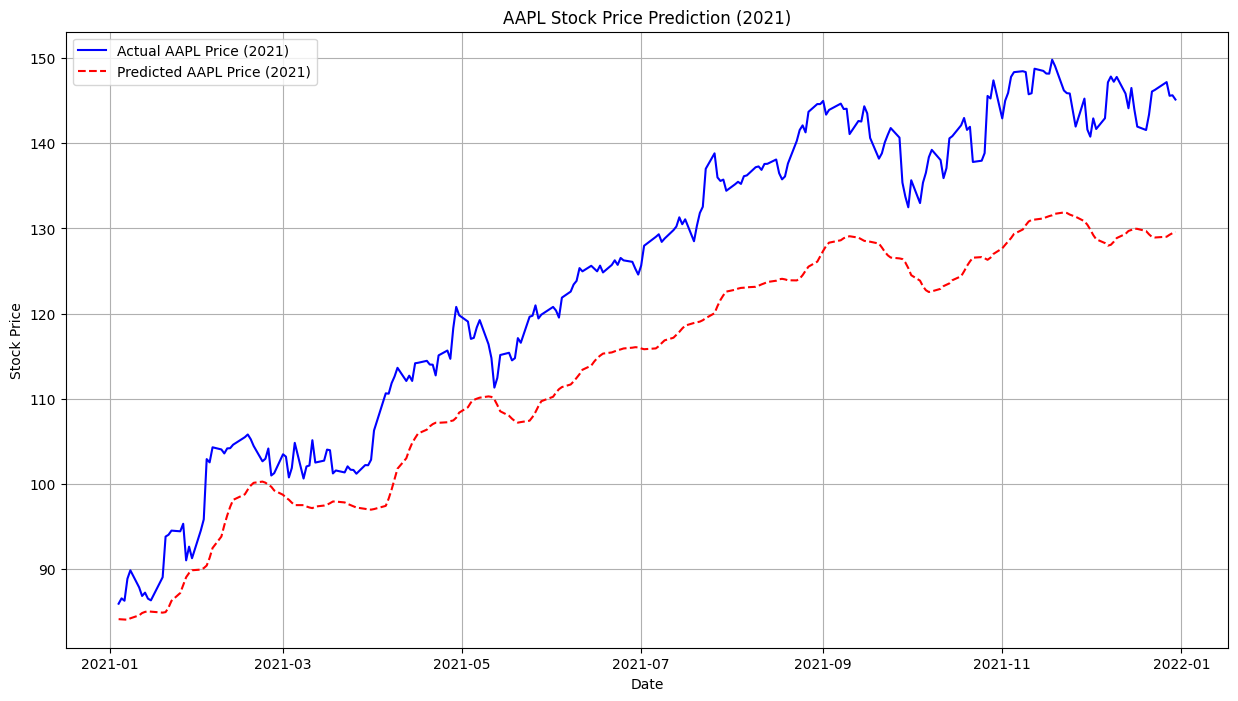


Root Mean Squared Error (RMSE) for 2021 predictions: 11.96


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL up to the end of 2021
print("Fetching historical stock data for GOOG...")
aapl_data = yf.download('GOOG', start='1980-12-12', end='2021-12-31')

# A more robust way to split the data by date range to avoid indexing errors
training_df = aapl_data.loc[:'2020-12-31']
testing_df = aapl_data.loc['2021-01-01':'2021-12-31']

training_data = training_df['Close'].values
testing_data = testing_df['Close'].values

# Scale the data using a scaler fitted only on the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data.reshape(-1, 1))
scaled_testing_data = scaler.transform(testing_data.reshape(-1, 1))

# Define the sequence length (look_back).
look_back = 60

# Function to create sequences and targets for the model
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data to the format required by LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
# Get the last look_back days from the training data to start the prediction loop
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.flatten().tolist()

# Loop through the testing data to make one prediction at a time
for i in range(len(scaled_testing_data)):
    # Reshape the current sequence for the model
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, 1)

    # Make a prediction
    scaled_prediction = model.predict(X_predict, verbose=0)

    # Store the predicted value
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual value from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i][0])

# Invert the predictions to the original price scale
predicted_prices = scaler.inverse_transform(np.array(predicted_2021).reshape(-1, 1))

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
# The dates for 2021 are now directly from the testing DataFrame index
dates_2021 = testing_df.index

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_data, color='blue', label='Actual GOOG Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted AAPL Price (2021)')
plt.title('GOOG Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


#Multivariate

Fetching historical stock data for AAPL and MSFT...


/tmp/ipython-input-2941830787.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='2000-03-13', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2941830787.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft_data = yf.download('MSFT', start='2000-03-13', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed


Training Data Shape: (5236, 2)
Testing Data Shape: (251, 2)
Training Input (X_train) Shape: (5176, 60, 2)
Training Target (y_train) Shape: (5176,)
------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0015 - val_loss: 7.5353e-04
Epoch 2/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.0995e-05 - val_loss: 0.0016
Epoch 3/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.2008e-05 - val_loss: 0.0032
Epoch 4/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.1924e-05 - val_loss: 8.7928e-04
Epoch 5/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.9413e-05 - val_loss: 0.0013
Epoch 6/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.9776e-05 - val_loss: 0.0021
Epoch 7/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.8071e-05 - val_loss: 0.0025
Epoch 8/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.6938e-05 - val_loss: 0.0022
Epoch 9/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4855e-05 - val_loss: 0.0048
Epoch 10/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6405e-05 - val_loss: 0.0022
Epoch 11/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9417e-05 - val_loss: 

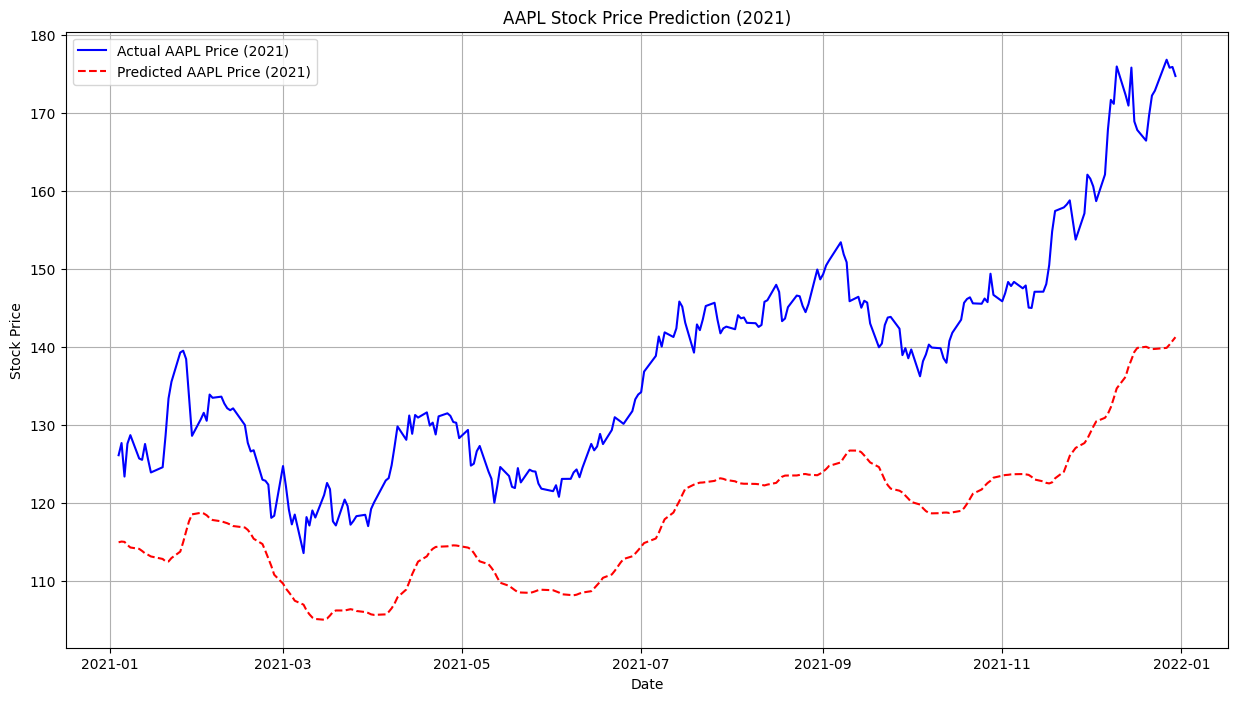


Root Mean Squared Error (RMSE) for 2021 predictions: 20.84


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL and a comparative stock (MSFT) up to the end of 2021
# We will start from MSFT's IPO date to ensure both datasets are non-empty
print("Fetching historical stock data for AAPL and MSFT...")
aapl_data = yf.download('AAPL', start='2000-03-13', end='2021-12-31')
msft_data = yf.download('MSFT', start='2000-03-13', end='2021-12-31')

# Combine the two datasets into a single DataFrame using an inner join
data_df = pd.concat([aapl_data['Close'], msft_data['Close']], axis=1, keys=['AAPL_Close', 'MSFT_Close'], join='inner')

# Split data into training (pre-2021) and testing (2021) sets
training_df = data_df.loc[:'2020-12-31']
testing_df = data_df.loc['2021-01-01':'2021-12-31']

# Separate the values for scaling
training_data = training_df.values
testing_data = testing_df.values

# Scale the data. The scaler is fitted on both features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_testing_data = scaler.transform(testing_data)

# Define the sequence length (look_back) and number of features
look_back = 60
n_features = scaled_training_data.shape[1] # This will be 2 (AAPL and MSFT)

# Function to create sequences and targets for the model
# The target remains the next day's AAPL close price (first column)
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        X.append(a)
        y.append(dataset[i + look_back, 0])  # Note: we only predict the first column (AAPL)
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
# The input_shape is now (look_back, n_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.tolist()

for i in range(len(scaled_testing_data)):
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, n_features)
    scaled_prediction = model.predict(X_predict, verbose=0)
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual values from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i].tolist())

# Invert the predictions to the original price scale
# We create a dummy array with the predicted AAPL prices and zeros for the second feature
predicted_prices_scaled = np.array(predicted_2021).reshape(-1, 1)
dummy_array = np.zeros(shape=(len(predicted_prices_scaled), n_features))
dummy_array[:, 0] = predicted_prices_scaled[:, 0]

# Now inverse transform the dummy array and extract the first column (AAPL)
predicted_prices = scaler.inverse_transform(dummy_array)[:, 0]


print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
dates_2021 = testing_df.index
testing_aapl_data = testing_df['AAPL_Close'].values

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_aapl_data, color='blue', label='Actual AAPL Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted AAPL Price (2021)')
plt.title('AAPL Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_aapl_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


Fetching historical stock data for AAPL and ELV...


/tmp/ipython-input-1473343745.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='2002-01-01', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1473343745.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  elv_data = yf.download('ELV', start='2002-01-01', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed

Training Data Shape: (4784, 2)
Testing Data Shape: (251, 2)
Training Input (X_train) Shape: (4724, 60, 2)
Training Target (y_train) Shape: (4724,)
------------------------------

Model Summary:



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0021 - val_loss: 9.1089e-04
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2990e-04 - val_loss: 0.0019
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1830e-04 - val_loss: 0.0025
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.6758e-05 - val_loss: 0.0017
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.1761e-05 - val_loss: 0.0021
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.8079e-05 - val_loss: 0.0027
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.1605e-05 - val_loss: 0.0030
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.4636e-05 - val_loss: 0.0021
Epoch 9/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.9537e-05 - val_loss: 0.0026
Epoch 10/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.3187e-05 - val_loss: 0.0026
Epoch 11/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7818e-05 - val_loss: 0.004

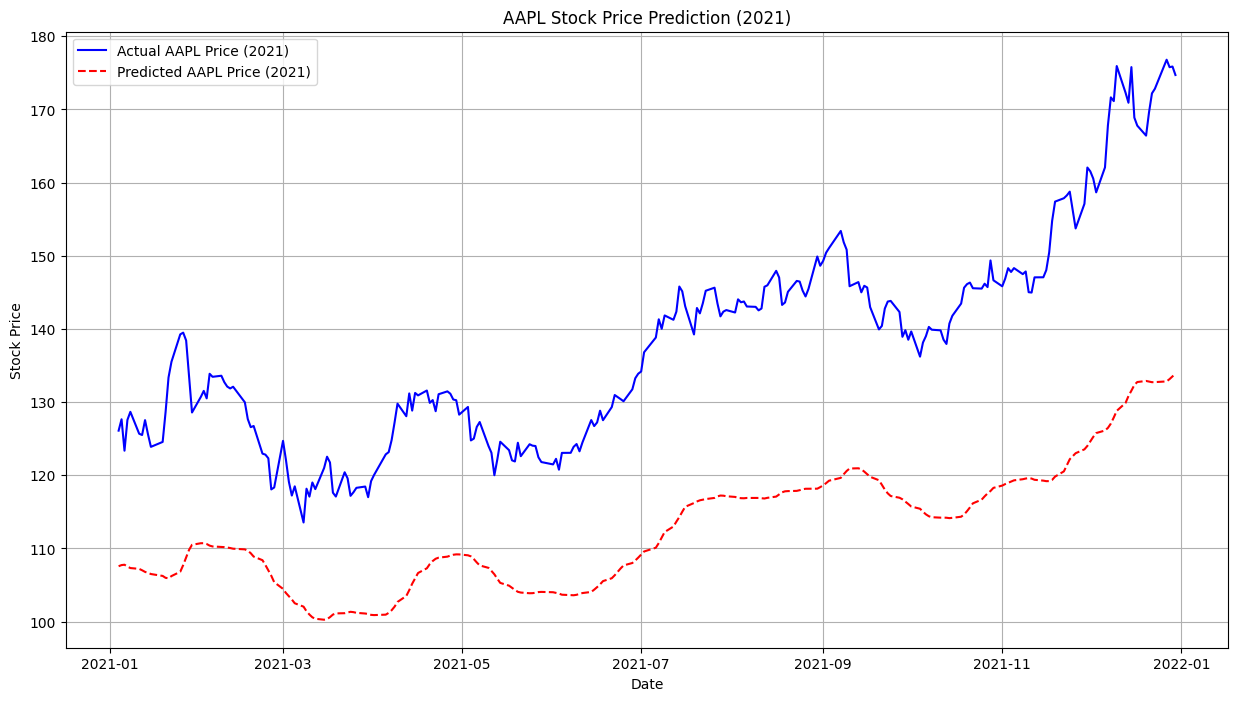


Root Mean Squared Error (RMSE) for 2021 predictions: 25.99


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL and a comparative stock (ELV) up to the end of 2021
# We will start from a common date (2002-01-01) to ensure both datasets align
print("Fetching historical stock data for AAPL and ELV...")
aapl_data = yf.download('AAPL', start='2002-01-01', end='2021-12-31')
elv_data = yf.download('ELV', start='2002-01-01', end='2021-12-31')

# Combine the two datasets into a single DataFrame using an inner join
data_df = pd.concat([aapl_data['Close'], elv_data['Close']], axis=1, keys=['AAPL_Close', 'ELV_Close'], join='inner')

# Split data into training (pre-2021) and testing (2021) sets
training_df = data_df.loc[:'2020-12-31']
testing_df = data_df.loc['2021-01-01':'2021-12-31']

# Separate the values for scaling
training_data = training_df.values
testing_data = testing_df.values

# Scale the data. The scaler is fitted on both features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_testing_data = scaler.transform(testing_data)

# Define the sequence length (look_back) and number of features
look_back = 60
n_features = scaled_training_data.shape[1] # This will be 2 (AAPL and ELV)

# Function to create sequences and targets for the model
# The target remains the next day's AAPL close price (first column)
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        X.append(a)
        y.append(dataset[i + look_back, 0])  # Note: we only predict the first column (AAPL)
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
# The input_shape is now (look_back, n_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.tolist()

for i in range(len(scaled_testing_data)):
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, n_features)
    scaled_prediction = model.predict(X_predict, verbose=0)
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual values from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i].tolist())

# Invert the predictions to the original price scale
predicted_prices_scaled = np.array(predicted_2021).reshape(-1, 1)
dummy_array = np.zeros(shape=(len(predicted_prices_scaled), n_features))
dummy_array[:, 0] = predicted_prices_scaled[:, 0]

# Now inverse transform the dummy array and extract the first column (AAPL)
predicted_prices = scaler.inverse_transform(dummy_array)[:, 0]

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
dates_2021 = testing_df.index
testing_aapl_data = testing_df['AAPL_Close'].values

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_aapl_data, color='blue', label='Actual AAPL Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted AAPL Price (2021)')
plt.title('AAPL Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_aapl_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


/tmp/ipython-input-161768854.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download('AAPL', start='2002-01-01', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed

Fetching historical stock data for AAPL and ELV...



/tmp/ipython-input-161768854.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  elv_data = yf.download('ELV', start='2002-01-01', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed


Training Data Shape: (4784, 2)
Testing Data Shape: (251, 2)
Training Input (X_train) Shape: (4724, 60, 2)
Training Target (y_train) Shape: (4724,)
------------------------------

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0089 - val_loss: 0.0033
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3839e-04 - val_loss: 0.0017
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6687e-04 - val_loss: 0.0061
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1368e-04 - val_loss: 0.0018
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1073e-04 - val_loss: 0.0014
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.2826e-04 - val_loss: 0.0014
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0296e-04 - val_loss: 0.0016
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4621e-04 - val_loss: 0.0023
Epoch 9/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5858e-04 - val_loss: 0.0014
Epoch 10/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8038e-04 - val_loss: 0.0022
Epoch 11/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.9532e-04 - val_loss: 0.0013
Ep

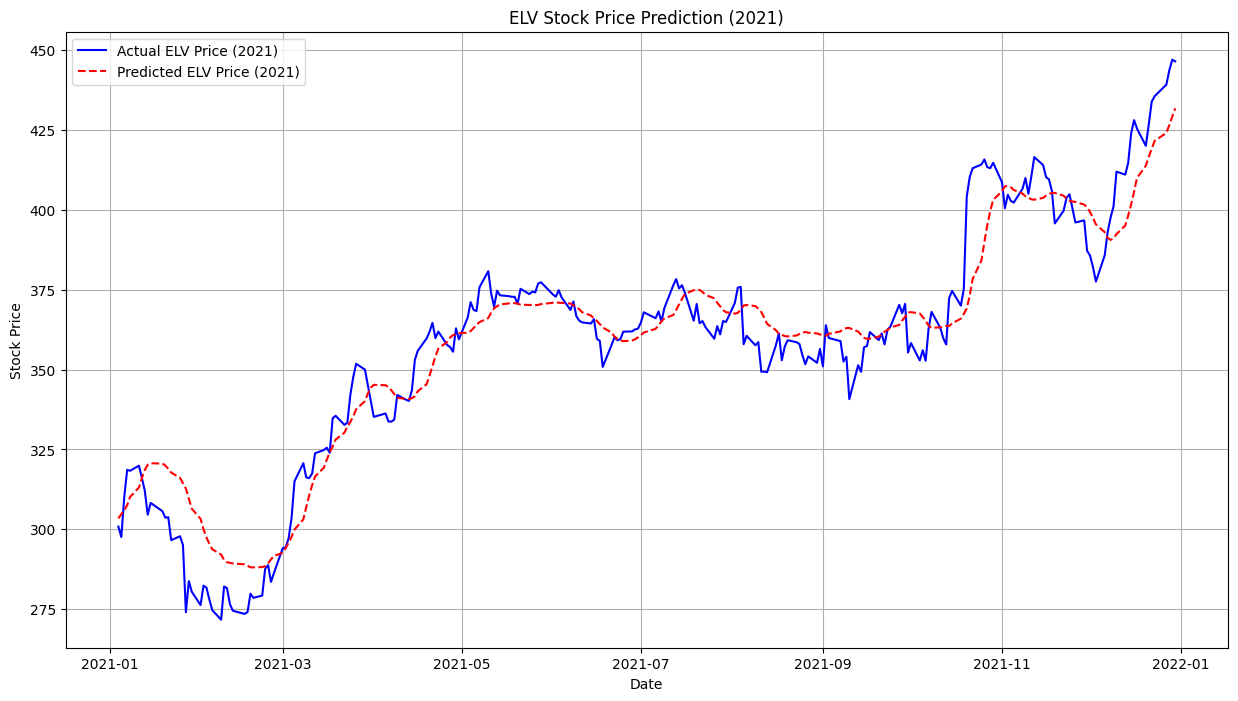


Root Mean Squared Error (RMSE) for 2021 predictions: 10.91


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AAPL and a comparative stock (ELV) up to the end of 2021
print("Fetching historical stock data for AAPL and ELV...")
aapl_data = yf.download('AAPL', start='2002-01-01', end='2021-12-31')
elv_data = yf.download('ELV', start='2002-01-01', end='2021-12-31')

# Combine the two datasets into a single DataFrame using an inner join
data_df = pd.concat([aapl_data['Close'], elv_data['Close']], axis=1, keys=['AAPL_Close', 'ELV_Close'], join='inner')

# Split data into training (pre-2021) and testing (2021) sets
training_df = data_df.loc[:'2020-12-31']
testing_df = data_df.loc['2021-01-01':'2021-12-31']

# Separate the values for scaling
training_data = training_df.values
testing_data = testing_df.values

# Scale the data. The scaler is fitted on both features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_testing_data = scaler.transform(testing_data)

# Define the sequence length (look_back) and number of features
look_back = 60
n_features = scaled_training_data.shape[1] # This will be 2 (AAPL and ELV)

# Function to create sequences and targets for the model
# The target is now the next day's ELV close price (second column)
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        X.append(a)
        y.append(dataset[i + look_back, 1])  # Note: we predict the second column (ELV)
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
# The input_shape is now (look_back, n_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.tolist()

for i in range(len(scaled_testing_data)):
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, n_features)
    scaled_prediction = model.predict(X_predict, verbose=0)
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual values from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i].tolist())

# Invert the predictions to the original price scale
predicted_prices_scaled = np.array(predicted_2021).reshape(-1, 1)
dummy_array = np.zeros(shape=(len(predicted_prices_scaled), n_features))
dummy_array[:, 1] = predicted_prices_scaled[:, 0]

# Now inverse transform the dummy array and extract the second column (ELV)
predicted_prices = scaler.inverse_transform(dummy_array)[:, 1]

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
dates_2021 = testing_df.index
testing_elv_data = testing_df['ELV_Close'].values

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_elv_data, color='blue', label='Actual ELV Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted ELV Price (2021)')
plt.title('ELV Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_elv_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


Fetching historical stock data for MSFT and GOOG...


/tmp/ipython-input-736922152.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft_data = yf.download('MSFT', start='2004-08-19', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-736922152.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  goog_data = yf.download('GOOG', start='2004-08-19', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed

Training Data Shape: (4122, 2)
Testing Data Shape: (251, 2)
Training Input (X_train) Shape: (4062, 60, 2)
Training Target (y_train) Shape: (4062,)
------------------------------

Model Summary:



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.3892e-04 - val_loss: 0.0023
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6640e-04 - val_loss: 0.0013
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5622e-04 - val_loss: 0.0024
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.0196e-04 - val_loss: 8.4304e-04
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.0506e-04 - val_loss: 8.4993e-04
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.1114e-04 - val_loss: 0.0012
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7515e-04 - val_loss: 9.1969e-04
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7029e-04 - val_loss: 6.8361e-04
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3185e-04 - val_loss: 6.7364e-04
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4746e-04

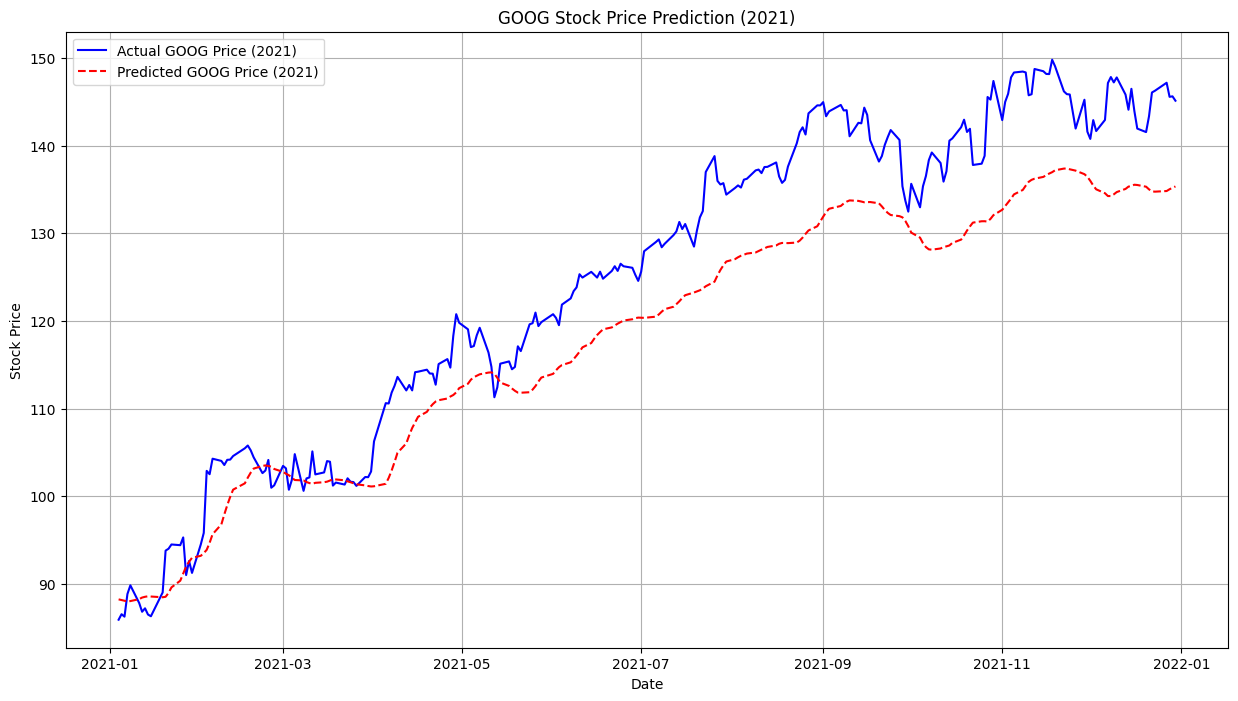


Root Mean Squared Error (RMSE) for 2021 predictions: 7.81


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for MSFT and GOOG up to the end of 2021
# We will start from GOOG's IPO date to ensure both datasets are non-empty
print("Fetching historical stock data for MSFT and GOOG...")
msft_data = yf.download('MSFT', start='2004-08-19', end='2021-12-31')
goog_data = yf.download('GOOG', start='2004-08-19', end='2021-12-31')

# Combine the two datasets into a single DataFrame using an inner join
data_df = pd.concat([msft_data['Close'], goog_data['Close']], axis=1, keys=['MSFT_Close', 'GOOG_Close'], join='inner')

# Split data into training (pre-2021) and testing (2021) sets
training_df = data_df.loc[:'2020-12-31']
testing_df = data_df.loc['2021-01-01':'2021-12-31']

# Separate the values for scaling
training_data = training_df.values
testing_data = testing_df.values

# Scale the data. The scaler is fitted on both features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_testing_data = scaler.transform(testing_data)

# Define the sequence length (look_back) and number of features
look_back = 60
n_features = scaled_training_data.shape[1] # This will be 2 (MSFT and GOOG)

# Function to create sequences and targets for the model
# The target is now the next day's GOOG close price (second column)
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        X.append(a)
        y.append(dataset[i + look_back, 1])  # Note: we predict the second column (GOOG)
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
# The input_shape is now (look_back, n_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.tolist()

for i in range(len(scaled_testing_data)):
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, n_features)
    scaled_prediction = model.predict(X_predict, verbose=0)
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual values from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i].tolist())

# Invert the predictions to the original price scale
predicted_prices_scaled = np.array(predicted_2021).reshape(-1, 1)
dummy_array = np.zeros(shape=(len(predicted_prices_scaled), n_features))
dummy_array[:, 1] = predicted_prices_scaled[:, 0]

# Now inverse transform the dummy array and extract the second column (GOOG)
predicted_prices = scaler.inverse_transform(dummy_array)[:, 1]

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
dates_2021 = testing_df.index
testing_goog_data = testing_df['GOOG_Close'].values

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_goog_data, color='blue', label='Actual GOOG Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted GOOG Price (2021)')
plt.title('GOOG Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_goog_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


Fetching historical stock data for AXP and GOOG...


/tmp/ipython-input-2211506919.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  axp_data = yf.download('AXP', start='2004-08-19', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2211506919.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  goog_data = yf.download('GOOG', start='2004-08-19', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed


Training Data Shape: (4122, 2)
Testing Data Shape: (251, 2)
Training Input (X_train) Shape: (4062, 60, 2)
Training Target (y_train) Shape: (4062,)
------------------------------

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0076 - val_loss: 7.9193e-04
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.4536e-04 - val_loss: 9.4238e-04
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.9931e-04 - val_loss: 8.2091e-04
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7696e-04 - val_loss: 0.0011
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7242e-04 - val_loss: 0.0012
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5498e-04 - val_loss: 0.0030
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1916e-04 - val_loss: 0.0011
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9098e-04 - val_loss: 7.2724e-04
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3675e-04 - val_loss: 7.7836e-04
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4475e-04 - val_loss: 0.0010
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2806e-04 

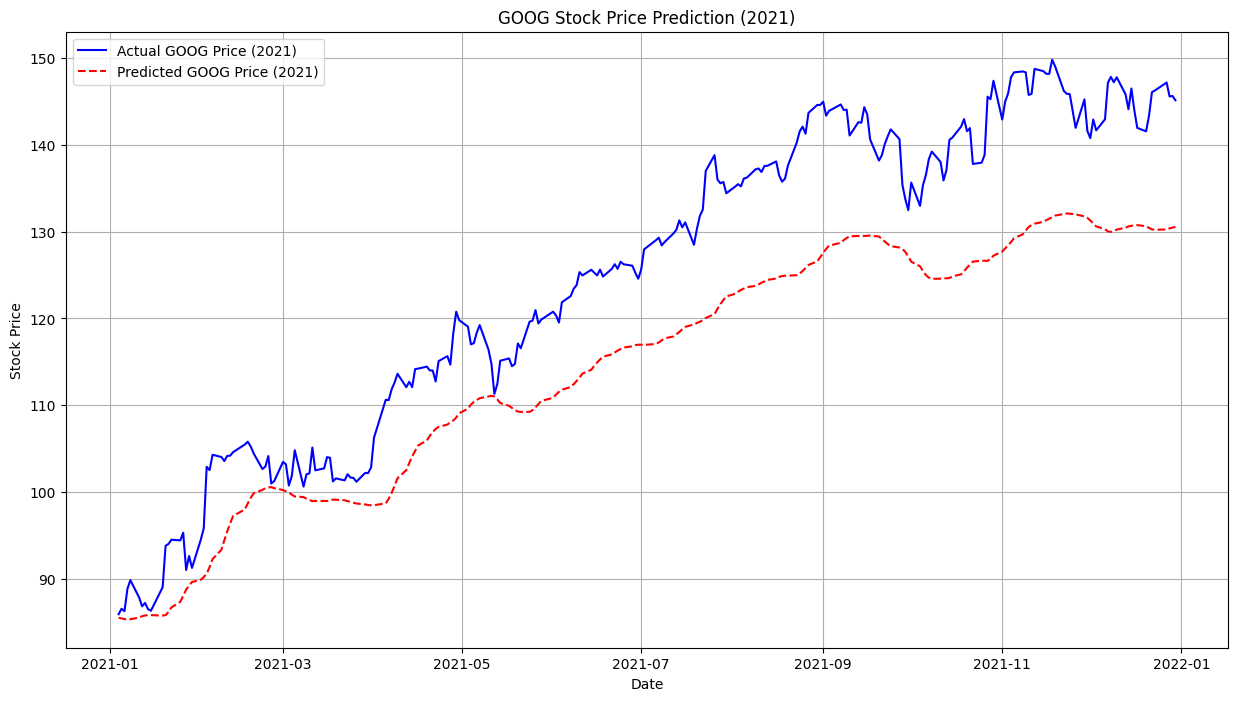


Root Mean Squared Error (RMSE) for 2021 predictions: 11.34


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for AXP and GOOG up to the end of 2021
# We will start from GOOG's IPO date to ensure both datasets are non-empty
print("Fetching historical stock data for AXP and GOOG...")
axp_data = yf.download('AXP', start='2004-08-19', end='2021-12-31')
goog_data = yf.download('GOOG', start='2004-08-19', end='2021-12-31')

# Combine the two datasets into a single DataFrame using an inner join
data_df = pd.concat([axp_data['Close'], goog_data['Close']], axis=1, keys=['AXP_Close', 'GOOG_Close'], join='inner')

# Split data into training (pre-2021) and testing (2021) sets
training_df = data_df.loc[:'2020-12-31']
testing_df = data_df.loc['2021-01-01':'2021-12-31']

# Separate the values for scaling
training_data = training_df.values
testing_data = testing_df.values

# Scale the data. The scaler is fitted on both features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_testing_data = scaler.transform(testing_data)

# Define the sequence length (look_back) and number of features
look_back = 60
n_features = scaled_training_data.shape[1] # This will be 2 (AXP and GOOG)

# Function to create sequences and targets for the model
# The target is now the next day's GOOG close price (second column)
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        X.append(a)
        y.append(dataset[i + look_back, 1])  # Note: we predict the second column (GOOG)
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
# The input_shape is now (look_back, n_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.tolist()

for i in range(len(scaled_testing_data)):
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, n_features)
    scaled_prediction = model.predict(X_predict, verbose=0)
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual values from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i].tolist())

# Invert the predictions to the original price scale
predicted_prices_scaled = np.array(predicted_2021).reshape(-1, 1)
dummy_array = np.zeros(shape=(len(predicted_prices_scaled), n_features))
dummy_array[:, 1] = predicted_prices_scaled[:, 0]

# Now inverse transform the dummy array and extract the second column (GOOG)
predicted_prices = scaler.inverse_transform(dummy_array)[:, 1]

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
dates_2021 = testing_df.index
testing_goog_data = testing_df['GOOG_Close'].values

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_goog_data, color='blue', label='Actual GOOG Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted GOOG Price (2021)')
plt.title('GOOG Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_goog_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")


/tmp/ipython-input-1678889917.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  goog_data = yf.download('GOOG', start='2004-08-19', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed

Fetching historical stock data for GOOG and AXP...



/tmp/ipython-input-1678889917.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  axp_data = yf.download('AXP', start='2004-08-19', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training Data Shape: (4122, 2)
Testing Data Shape: (251, 2)
Training Input (X_train) Shape: (4062, 60, 2)
Training Target (y_train) Shape: (4062,)
------------------------------

Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0237 - val_loss: 0.0022
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.6361e-04 - val_loss: 0.0022
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5059e-04 - val_loss: 0.0016
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.7096e-04 - val_loss: 0.0048
Epoch 12/25
51/51 ━━━━━━━━━━

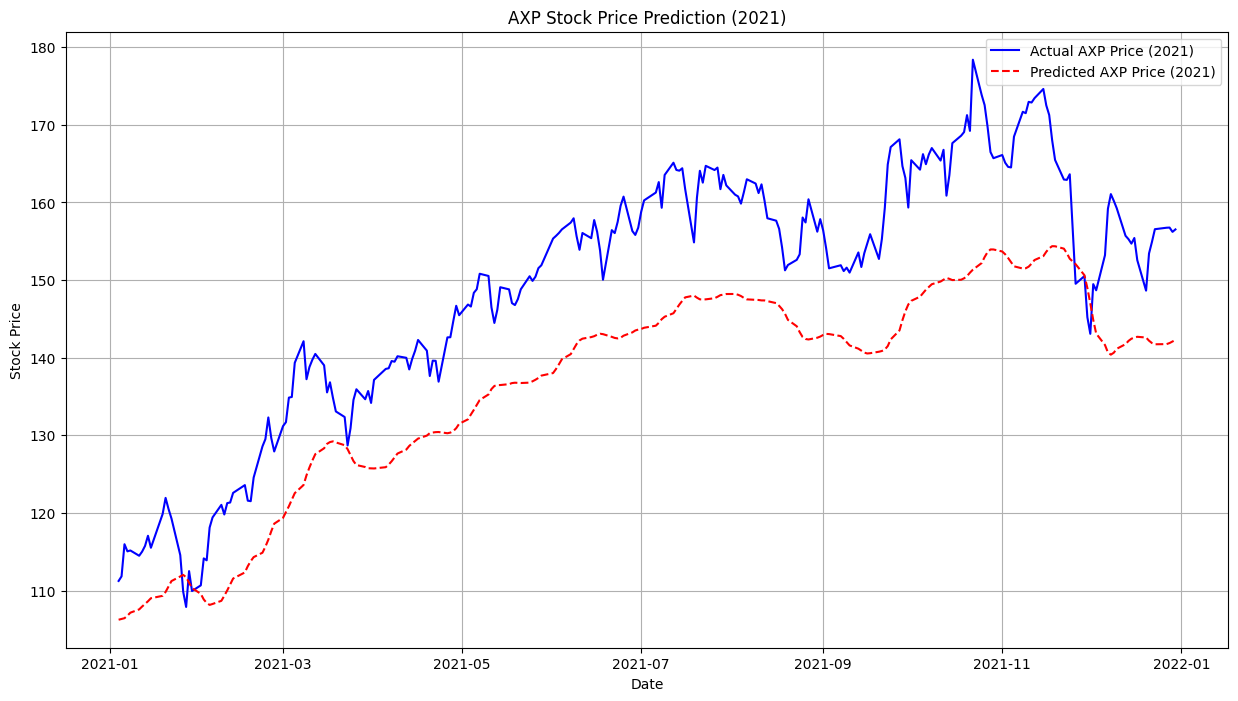


Root Mean Squared Error (RMSE) for 2021 predictions: 13.46


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# --- Step 1: Data Preparation ---
# Fetch historical stock data for GOOG and AXP up to the end of 2021
# We will start from GOOG's IPO date to ensure both datasets are non-empty
print("Fetching historical stock data for GOOG and AXP...")
goog_data = yf.download('GOOG', start='2004-08-19', end='2021-12-31')
axp_data = yf.download('AXP', start='2004-08-19', end='2021-12-31')

# Combine the two datasets into a single DataFrame using an inner join
data_df = pd.concat([goog_data['Close'], axp_data['Close']], axis=1, keys=['GOOG_Close', 'AXP_Close'], join='inner')

# Split data into training (pre-2021) and testing (2021) sets
training_df = data_df.loc[:'2020-12-31']
testing_df = data_df.loc['2021-01-01':'2021-12-31']

# Separate the values for scaling
training_data = training_df.values
testing_data = testing_df.values

# Scale the data. The scaler is fitted on both features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_testing_data = scaler.transform(testing_data)

# Define the sequence length (look_back) and number of features
look_back = 60
n_features = scaled_training_data.shape[1] # This will be 2 (GOOG and AXP)

# Function to create sequences and targets for the model
# The target is now the next day's AXP close price (second column)
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        X.append(a)
        y.append(dataset[i + look_back, 1])  # Note: we predict the second column (AXP)
    return np.array(X), np.array(y)

# Create the training data
X_train, y_train = create_dataset(scaled_training_data, look_back)

# Reshape the input data for LSTM: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

print("Training Data Shape:", training_data.shape)
print("Testing Data Shape:", testing_data.shape)
print("Training Input (X_train) Shape:", X_train.shape)
print("Training Target (y_train) Shape:", y_train.shape)
print("-" * 30)

# --- Step 2: Build and Train the LSTM Model ---
model = Sequential()
# The input_shape is now (look_back, n_features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
print("\nModel Summary:")
model.summary()

print("\nTraining the model...")
model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2)

# --- Step 3: Make Predictions for 2021 ---
initial_sequence = scaled_training_data[-look_back:]
predicted_2021 = []
current_sequence = initial_sequence.tolist()

for i in range(len(scaled_testing_data)):
    X_predict = np.array(current_sequence[-look_back:]).reshape(1, look_back, n_features)
    scaled_prediction = model.predict(X_predict, verbose=0)
    predicted_2021.append(scaled_prediction[0][0])

    # Add the actual values from the testing data to the sequence for the next prediction
    current_sequence.append(scaled_testing_data[i].tolist())

# Invert the predictions to the original price scale
predicted_prices_scaled = np.array(predicted_2021).reshape(-1, 1)
dummy_array = np.zeros(shape=(len(predicted_prices_scaled), n_features))
dummy_array[:, 1] = predicted_prices_scaled[:, 0]

# Now inverse transform the dummy array and extract the second column (AXP)
predicted_prices = scaler.inverse_transform(dummy_array)[:, 1]

print("\nPrediction complete for 2021.")

# --- Step 4: Visualize the Results ---
dates_2021 = testing_df.index
testing_axp_data = testing_df['AXP_Close'].values

plt.figure(figsize=(15, 8))
plt.plot(dates_2021, testing_axp_data, color='blue', label='Actual AXP Price (2021)')
plt.plot(dates_2021, predicted_prices, color='red', linestyle='--', label='Predicted AXP Price (2021)')
plt.title('AXP Stock Price Prediction (2021)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Print a final evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testing_axp_data, predicted_prices))
print(f"\nRoot Mean Squared Error (RMSE) for 2021 predictions: {rmse:.2f}")
